In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn import tree

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,fbeta_score
from sklearn.metrics import log_loss
from sklearn import metrics

from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

from IPython.display import Image  
from six import StringIO  
import graphviz
import pydot 

In [3]:
ccdata = pd.read_csv('BankChurners.csv') 
ccdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#run once
ccdata.drop("CLIENTNUM",axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [5]:
#run once
ccdata['Gender'].replace({'M':1,'F':0},inplace=True)
ccdata["Attrition_Flag"].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [6]:
ccdata.keys()

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
features = list(ccdata.columns[1:])
features

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [8]:
#run once
#drop_first = True to avoid structural multicollinearity
ccdata2 = pd.get_dummies(data=ccdata,columns=['Education_Level','Marital_Status',"Income_Category",'Card_Category'],drop_first=True)
ccdata2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [9]:
#data multicollinearity prevention
ccdata2.drop(['Avg_Open_To_Buy','Customer_Age','Total_Trans_Ct','Months_on_book','Total_Amt_Chng_Q4_Q1'],axis=1,inplace=True)

In [10]:
X = ccdata2.drop("Attrition_Flag",axis=1)
y = ccdata2['Attrition_Flag']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [15]:
def dtree_results(X_train,X_test,y_train,y_test):
    print('Decision Tree Model Results\n')
    #post-optimization params
    model = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20)
    #model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    dtreepreds = model.predict(X_test)
    print(classification_report(y_test,dtreepreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,dtreepreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score', round(accuracy_score(y_test,dtreepreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,dtreepreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test,dtreepreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, dtreepreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n')    
    df = pd.DataFrame({"Feature_names":X_train.columns,'Importances':model.feature_importances_})
    df1 = df.sort_values(by='Importances',ascending=False).reset_index()
    print(df1,'\n')
    df2 = df1[:12].sort_values(by='Importances',ascending=False).reset_index()
    
    #plt.figure(figsize=(6,6))
    #plt.barh(df2['Feature_names'],df2['Importances'])
    #plt.show()
    #plt.tight_layout()
    #print('\n')
    
    #dtreeimportance = model.feature_importances_
    #for i,v in enumerate(dtreeimportance):
    #    print('Feature: %0d, Score: %.5f' % (i,v))
    #plt.bar([x for x in range(len(dtreeimportance))],dtreeimportance)
    #plt.show()
    df2['cumsum'] =  df2['Importances'].cumsum(axis=0)
    df2 = df2.set_index("Feature_names")
    
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
    fig.suptitle("Features Importance", fontsize=15)
    ax[0].title.set_text('variables')
    df2[["Importances"]].sort_values(by="Importances").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
    ax[0].set(ylabel="")
    ax[1].title.set_text('cumulative')
    
    df2[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
    ax[1].set(xlabel="", xticks=np.arange(len(df2)), 
          xticklabels=df2.index)
    plt.xticks(rotation=70)
    plt.grid(axis='both')
    plt.show()
    plt.tight_layout()
    
    plt.figure(figsize=(20,12))
    tree.plot_tree(model, filled=True, rounded=True,class_names=['Existing Customer','Attrited Customer'],
             feature_names=X_train.columns)

## Hyperparameter Optimization

In [357]:
r_dtree = DecisionTreeClassifier()

In [358]:
from sklearn.model_selection import GridSearchCV

In [359]:
dtreeparam_grid = [
    {
        'criterion':['gini','entropy'],
        'splitter': ['best'],
        'max_depth':np.arange(5,21,1),
        'min_samples_leaf':[20,25,30,35,40]
    }
]

In [360]:
clf = GridSearchCV(r_dtree, param_grid = dtreeparam_grid, cv = 5, verbose=True, n_jobs = -1)

In [361]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [362]:
rawresults = pd.DataFrame(best_clf.cv_results_)
#rawresults

In [363]:
best_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20)

In [366]:
best_clf.best_score_

0.9197235264315143

## Preliminary Testing (Pre-feature Selection)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2551
           1       0.81      0.70      0.75       488

    accuracy                           0.93      3039
   macro avg       0.88      0.83      0.85      3039
weighted avg       0.92      0.93      0.92      3039

Confusion Matrix
 [[2471   80]
 [ 147  341]]


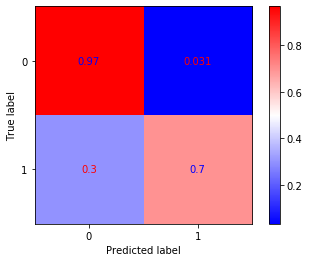

Accuracy Score 92.53 %
Recall: 69.88 %
Precision: 81.0 %
F2 Score: 71.85 %

The Training Accuracy is : 0.9396162528216704
The Testing Accuracy is : 0.9253043764396183
The log loss on training data is  0.14195603413497127
The log loss on testing data is  0.3654191624479299 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.476372
1       6             Total_Revolving_Bal     0.225610
2       8             Total_Ct_Chng_Q4_Q1     0.124578
3       2        Total_Relationship_Count     0.118453
4       5                    Credit_Limit     0.024972
5       9           Avg_Utilization_Ratio     0.011819
6       1                 Dependent_count     0.006679
7       0                          Gender     0.005117
8       4           Contacts_Count_12_mon     0.003115
9      13   Education_Level_Post-Graduate     0.002690
10      3          Months_Inactive_12_mon     0.000594
11     10       Education_Level_Doctorate     0.000000
12     19 

<Figure size 720x720 with 0 Axes>

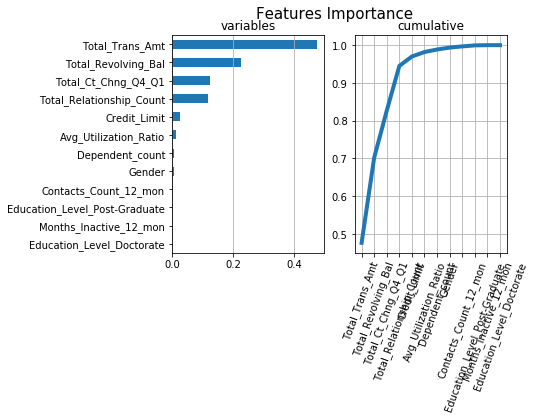

<Figure size 432x288 with 0 Axes>

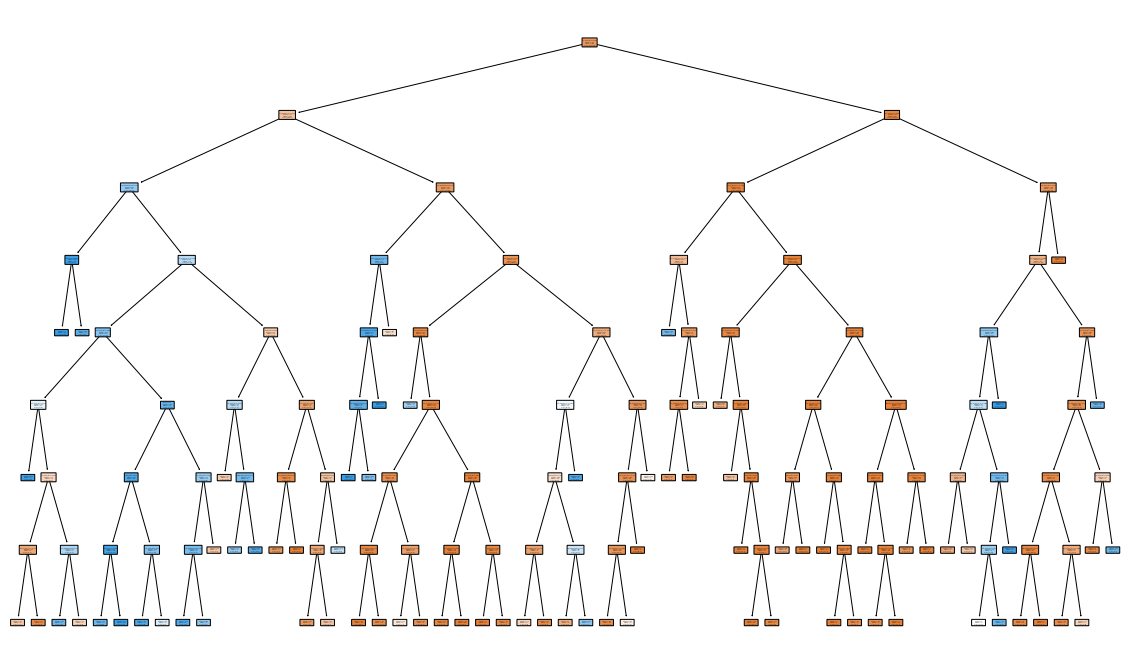

In [16]:
#post-optimization results
dtree_results(X_train,X_test,y_train,y_test)

In [17]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm, y_sm = smote.fit_resample(X_train,y_train)

y_sm.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2551
           1       0.62      0.84      0.71       488

    accuracy                           0.89      3039
   macro avg       0.79      0.87      0.82      3039
weighted avg       0.91      0.89      0.90      3039

Confusion Matrix
 [[2297  254]
 [  80  408]]


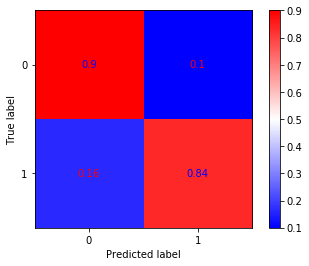

Accuracy Score 89.01 %
Recall: 83.61 %
Precision: 61.63 %
F2 Score: 78.04 %

The Training Accuracy is : 0.9193141704488149
The Testing Accuracy is : 0.8900954261270154
The log loss on training data is  0.18289555752820177
The log loss on testing data is  0.47093682560660005 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.489955
1       6             Total_Revolving_Bal     0.194286
2       2        Total_Relationship_Count     0.103028
3       8             Total_Ct_Chng_Q4_Q1     0.092065
4       5                    Credit_Limit     0.055833
5       0                          Gender     0.025988
6      16          Marital_Status_Married     0.011559
7      17           Marital_Status_Single     0.009981
8       1                 Dependent_count     0.006167
9      22  Income_Category_Less than $40K     0.002413
10     14      Education_Level_Uneducated     0.002284
11     11        Education_Level_Graduate     0.001807
12      

<Figure size 720x720 with 0 Axes>

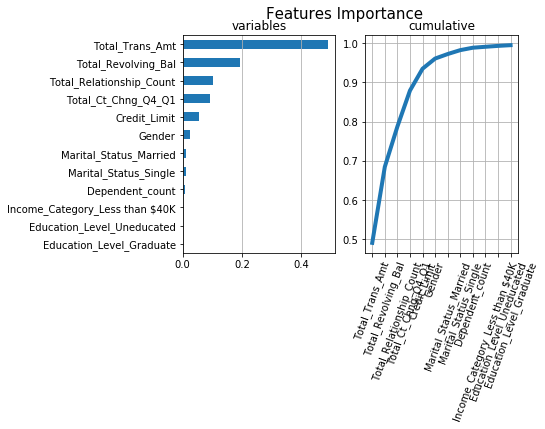

<Figure size 432x288 with 0 Axes>

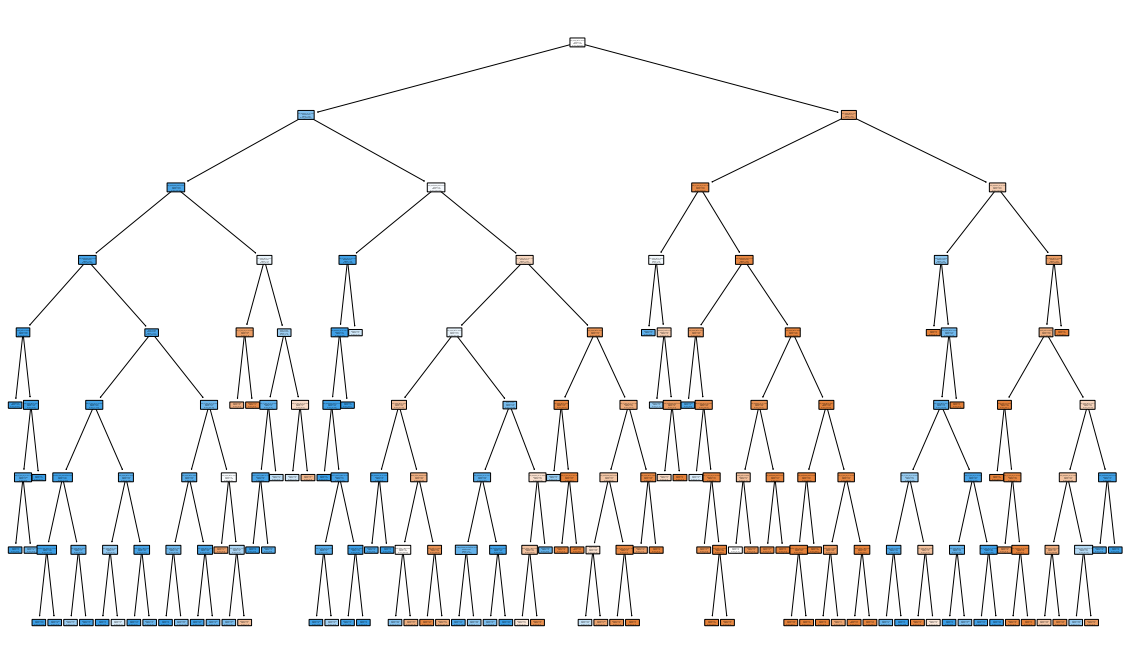

In [18]:
dtree_results(X_sm,X_test,y_sm,y_test)

In [19]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train3, y_train3 = pipeline.fit_resample(X_train,y_train)
y_train3.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2551
           1       0.61      0.84      0.70       488

    accuracy                           0.89      3039
   macro avg       0.79      0.87      0.82      3039
weighted avg       0.91      0.89      0.89      3039

Confusion Matrix
 [[2285  266]
 [  80  408]]


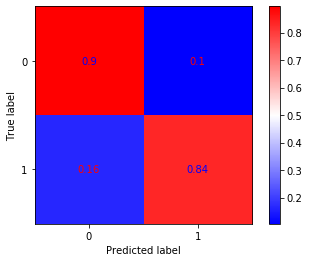

Accuracy Score 88.61 %
Recall: 83.61 %
Precision: 60.53 %
F2 Score: 77.68 %

The Training Accuracy is : 0.9068411097099621
The Testing Accuracy is : 0.8861467588022376
The log loss on training data is  0.1981415058582679
The log loss on testing data is  0.5187468120990976 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.491197
1       8             Total_Ct_Chng_Q4_Q1     0.152145
2       2        Total_Relationship_Count     0.132272
3       6             Total_Revolving_Bal     0.124976
4       5                    Credit_Limit     0.038484
5       0                          Gender     0.021206
6       9           Avg_Utilization_Ratio     0.013278
7      16          Marital_Status_Married     0.009503
8       3          Months_Inactive_12_mon     0.009158
9      17           Marital_Status_Single     0.003493
10     19     Income_Category_$40K - $60K     0.003289
11     13   Education_Level_Post-Graduate     0.001000
12     12 

<Figure size 720x720 with 0 Axes>

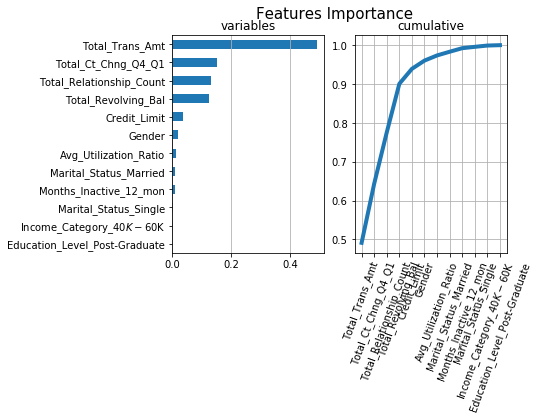

<Figure size 432x288 with 0 Axes>

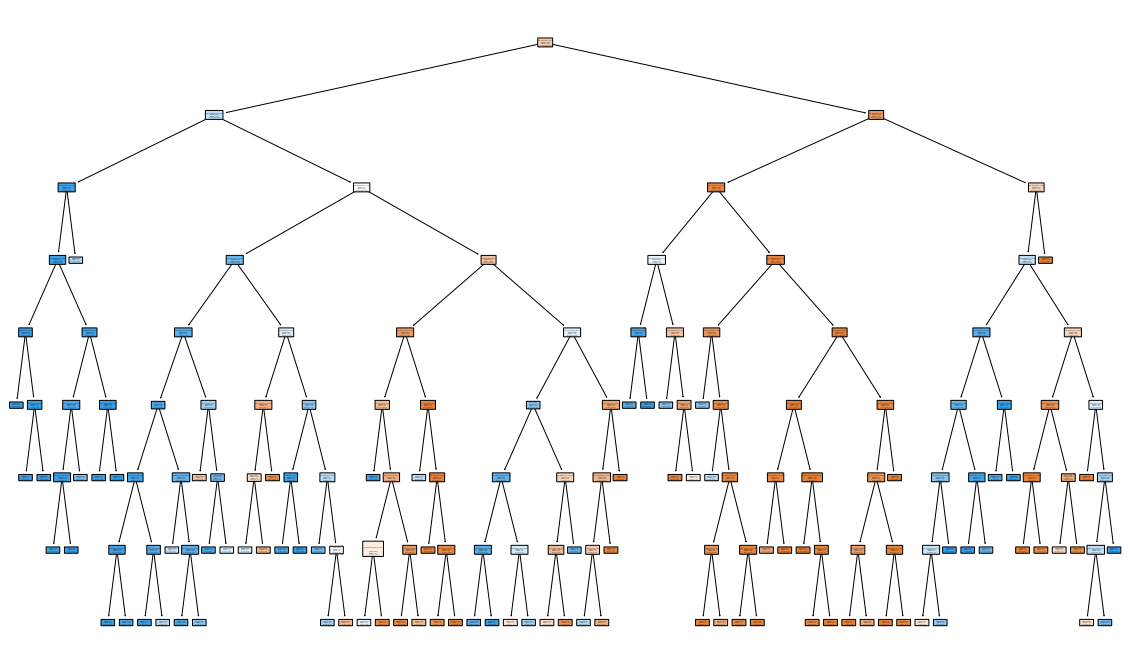

In [20]:
dtree_results(X_train3,X_test,y_train3,y_test)

## Post-feature selection

In [21]:

X_train2 = X_train.filter(['Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Credit_Limit','Avg_Utilization_Ratio','Dependent_count','Gender','Contacts_Count_12_mon','Education_Level_Post-Graduate','Months_Inactive_12_mon'],axis=1)
X_test2 = X_test.filter(['Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Credit_Limit','Avg_Utilization_Ratio','Dependent_count','Gender','Contacts_Count_12_mon','Education_Level_Post-Graduate','Months_Inactive_12_mon'],axis=1)
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 7403 to 8523
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total_Trans_Amt                3039 non-null   int64  
 1   Total_Revolving_Bal            3039 non-null   int64  
 2   Total_Ct_Chng_Q4_Q1            3039 non-null   float64
 3   Total_Relationship_Count       3039 non-null   int64  
 4   Credit_Limit                   3039 non-null   float64
 5   Avg_Utilization_Ratio          3039 non-null   float64
 6   Dependent_count                3039 non-null   int64  
 7   Gender                         3039 non-null   int64  
 8   Contacts_Count_12_mon          3039 non-null   int64  
 9   Education_Level_Post-Graduate  3039 non-null   uint8  
 10  Months_Inactive_12_mon         3039 non-null   int64  
dtypes: float64(3), int64(7), uint8(1)
memory usage: 264.1 KB


Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2551
           1       0.81      0.70      0.75       488

    accuracy                           0.93      3039
   macro avg       0.88      0.83      0.85      3039
weighted avg       0.92      0.93      0.92      3039

Confusion Matrix
 [[2471   80]
 [ 147  341]]


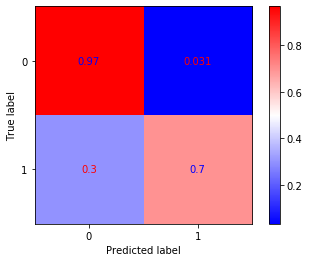

Accuracy Score 92.53 %
Recall: 69.88 %
Precision: 81.0 %
F2 Score: 71.85 %

The Training Accuracy is : 0.9396162528216704
The Testing Accuracy is : 0.9253043764396183
The log loss on training data is  0.14195603413497127
The log loss on testing data is  0.3654191624479299 

    index                  Feature_names  Importances
0       0                Total_Trans_Amt     0.476372
1       1            Total_Revolving_Bal     0.225610
2       2            Total_Ct_Chng_Q4_Q1     0.124578
3       3       Total_Relationship_Count     0.118453
4       4                   Credit_Limit     0.024972
5       5          Avg_Utilization_Ratio     0.011819
6       6                Dependent_count     0.006679
7       7                         Gender     0.005117
8       8          Contacts_Count_12_mon     0.003115
9       9  Education_Level_Post-Graduate     0.002690
10     10         Months_Inactive_12_mon     0.000594 



<Figure size 720x720 with 0 Axes>

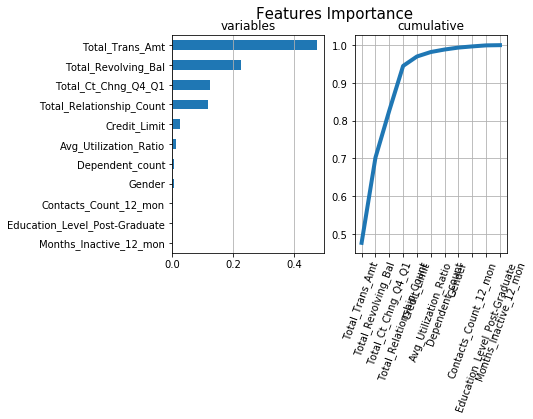

<Figure size 432x288 with 0 Axes>

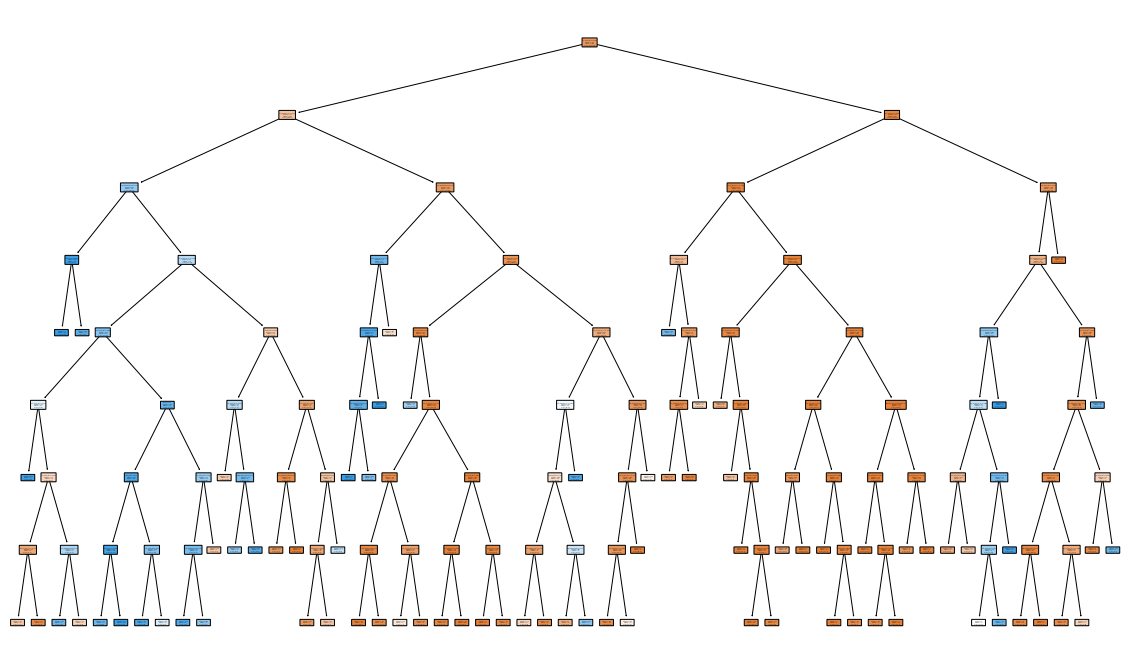

In [22]:
#non-resampled results
dtree_results(X_train2,X_test2,y_train,y_test)

In [23]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm2, y_sm2 = smote.fit_resample(X_train2,y_train)

y_sm2.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2551
           1       0.61      0.84      0.71       488

    accuracy                           0.89      3039
   macro avg       0.79      0.87      0.82      3039
weighted avg       0.91      0.89      0.89      3039

Confusion Matrix
 [[2283  268]
 [  76  412]]


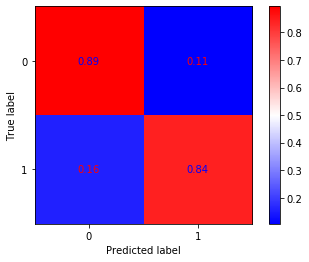

Accuracy Score 88.68 %
Recall: 84.43 %
Precision: 60.59 %
F2 Score: 78.27 %

The Training Accuracy is : 0.9182215498403093
The Testing Accuracy is : 0.8868048700230339
The log loss on training data is  0.17990296116432195
The log loss on testing data is  0.5060765495590098 

    index                  Feature_names  Importances
0       0                Total_Trans_Amt     0.497496
1       1            Total_Revolving_Bal     0.167400
2       3       Total_Relationship_Count     0.116679
3       2            Total_Ct_Chng_Q4_Q1     0.098569
4       4                   Credit_Limit     0.059241
5       7                         Gender     0.035242
6       5          Avg_Utilization_Ratio     0.010482
7      10         Months_Inactive_12_mon     0.007741
8       8          Contacts_Count_12_mon     0.005050
9       6                Dependent_count     0.002100
10      9  Education_Level_Post-Graduate     0.000000 



<Figure size 720x720 with 0 Axes>

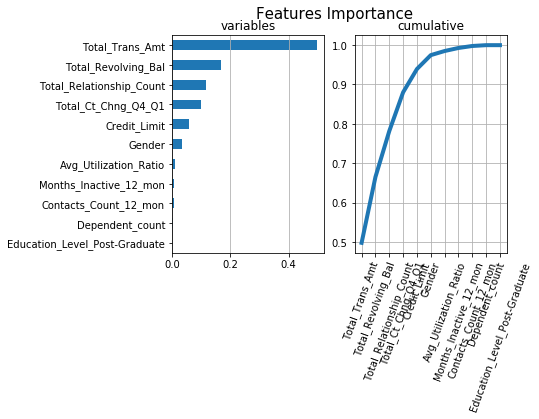

<Figure size 432x288 with 0 Axes>

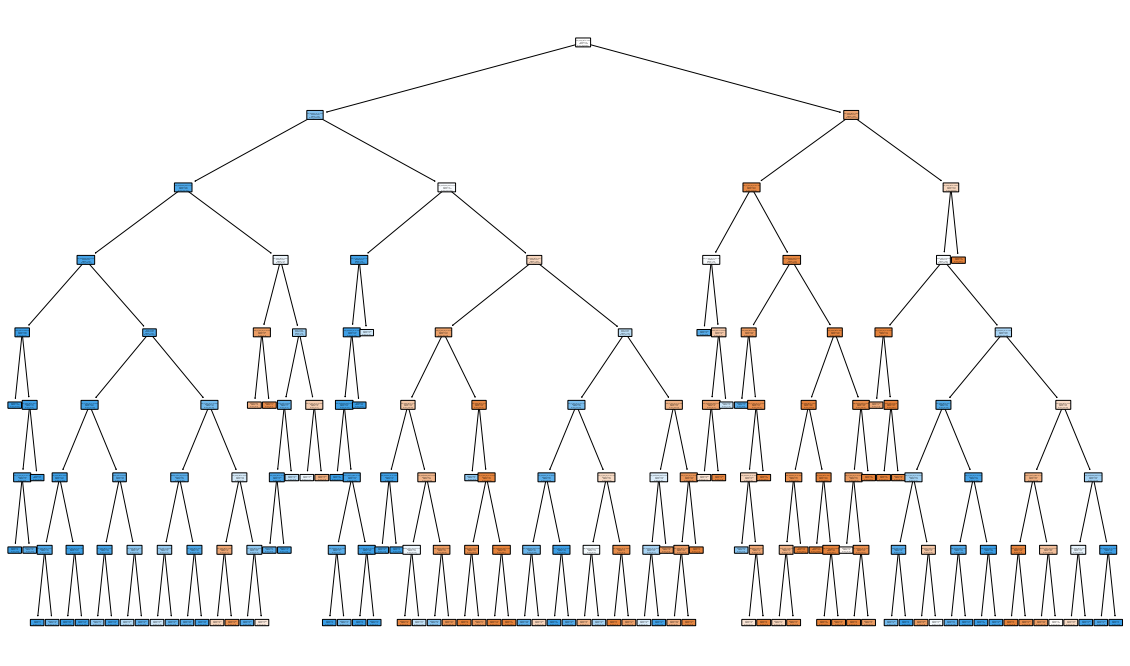

In [24]:
dtree_results(X_sm2,X_test2,y_sm2,y_test)

In [25]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train4, y_train4 = pipeline.fit_resample(X_train2,y_train)
y_train4.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2551
           1       0.62      0.86      0.72       488

    accuracy                           0.89      3039
   macro avg       0.80      0.88      0.83      3039
weighted avg       0.91      0.89      0.90      3039

Confusion Matrix
 [[2300  251]
 [  70  418]]


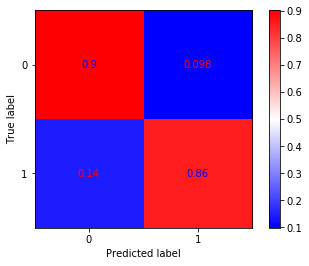

Accuracy Score 89.44 %
Recall: 85.66 %
Precision: 62.48 %
F2 Score: 79.74 %

The Training Accuracy is : 0.9098360655737705
The Testing Accuracy is : 0.8943731490621916
The log loss on training data is  0.1944156319631491
The log loss on testing data is  0.6858852076138028 

    index                  Feature_names  Importances
0       0                Total_Trans_Amt     0.509600
1       2            Total_Ct_Chng_Q4_Q1     0.156822
2       3       Total_Relationship_Count     0.134725
3       1            Total_Revolving_Bal     0.121174
4       7                         Gender     0.021564
5       5          Avg_Utilization_Ratio     0.019812
6       4                   Credit_Limit     0.017631
7      10         Months_Inactive_12_mon     0.011685
8       8          Contacts_Count_12_mon     0.006011
9       9  Education_Level_Post-Graduate     0.000976
10      6                Dependent_count     0.000000 



<Figure size 720x720 with 0 Axes>

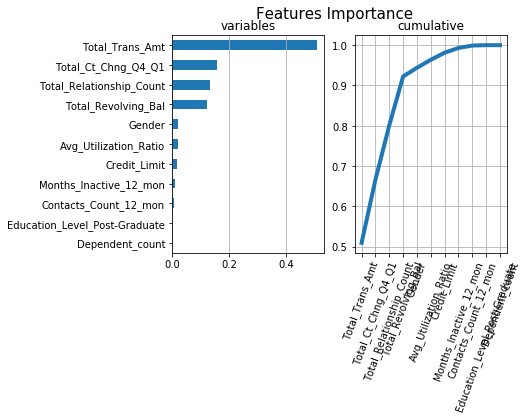

<Figure size 432x288 with 0 Axes>

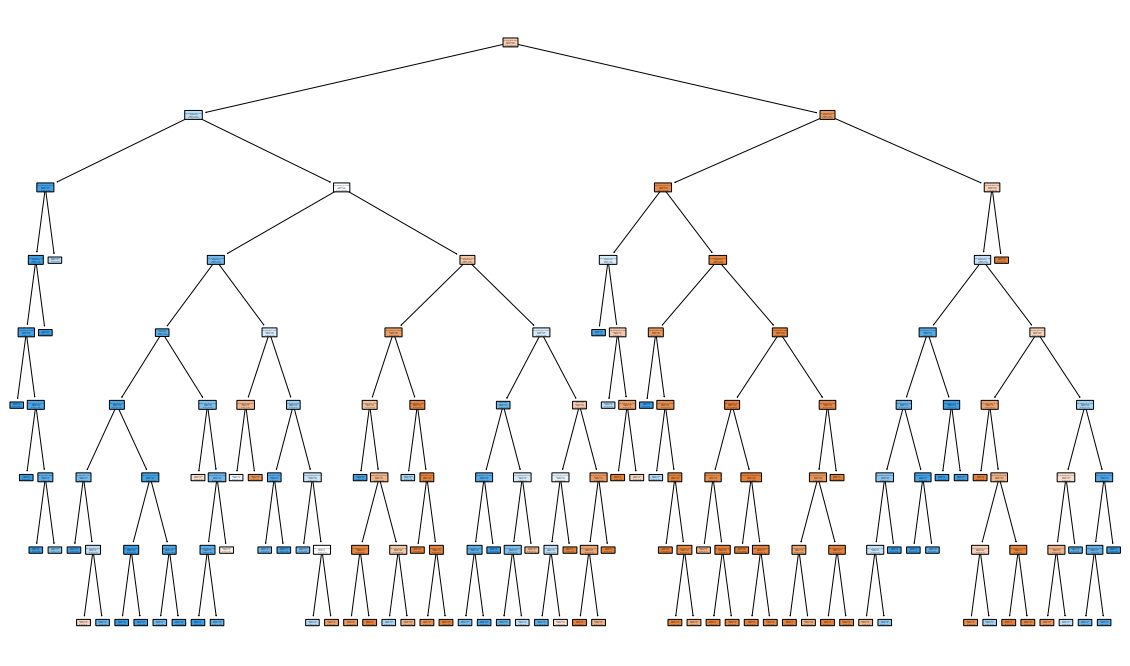

In [26]:
dtree_results(X_train4,X_test2,y_train4,y_test)

## Class weight rebalancing (Pre-feature selection)

In [27]:
def weighted_dtree_results(X_train,X_test,y_train,y_test):
    print('Decision Tree Model Results\n')
    #post-optimization params
    model = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20, class_weight='balanced')
    #model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    dtreepreds = model.predict(X_test)
    print(classification_report(y_test,dtreepreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,dtreepreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score', round(accuracy_score(y_test,dtreepreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,dtreepreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test,dtreepreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, dtreepreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n')    
    df = pd.DataFrame({"Feature_names":X_train.columns,'Importances':model.feature_importances_})
    df1 = df.sort_values(by='Importances',ascending=False).reset_index()
    print(df1,'\n')
    df2 = df1[:12].sort_values(by='Importances',ascending=False).reset_index()
    
    #plt.figure(figsize=(6,6))
    #plt.barh(df2['Feature_names'],df2['Importances'])
    #plt.show()
    #plt.tight_layout()
    #print('\n')
    
    #dtreeimportance = model.feature_importances_
    #for i,v in enumerate(dtreeimportance):
    #    print('Feature: %0d, Score: %.5f' % (i,v))
    #plt.bar([x for x in range(len(dtreeimportance))],dtreeimportance)
    #plt.show()
    df2['cumsum'] =  df2['Importances'].cumsum(axis=0)
    df2 = df2.set_index("Feature_names")
    
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
    fig.suptitle("Features Importance", fontsize=15)
    ax[0].title.set_text('variables')
    df2[["Importances"]].sort_values(by="Importances").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
    ax[0].set(ylabel="")
    ax[1].title.set_text('cumulative')
    
    df2[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
    ax[1].set(xlabel="", xticks=np.arange(len(df2)), 
          xticklabels=df2.index)
    plt.xticks(rotation=70)
    plt.grid(axis='both')
    plt.show()
    plt.tight_layout()
    
    plt.figure(figsize=(20,12))
    tree.plot_tree(model, filled=True, rounded=True,class_names=['Existing Customer','Attrited Customer'],
             feature_names=X_train.columns)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2551
           1       0.61      0.91      0.73       488

    accuracy                           0.89      3039
   macro avg       0.80      0.90      0.83      3039
weighted avg       0.92      0.89      0.90      3039

Confusion Matrix
 [[2270  281]
 [  46  442]]


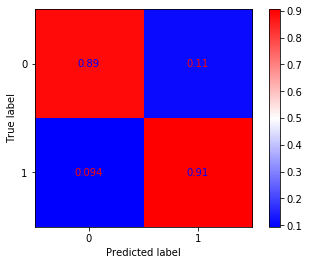

Accuracy Score 89.24 %
Recall: 90.57 %
Precision: 61.13 %
F2 Score: 82.62 %

The Training Accuracy is : 0.9057562076749436
The Testing Accuracy is : 0.8923988153998026
The log loss on training data is  0.20951956690071327
The log loss on testing data is  0.4483933217144716 

    index                   Feature_names   Importances
0       7                 Total_Trans_Amt  5.487371e-01
1       6             Total_Revolving_Bal  1.745810e-01
2       8             Total_Ct_Chng_Q4_Q1  1.330253e-01
3       2        Total_Relationship_Count  9.106925e-02
4       5                    Credit_Limit  2.110957e-02
5       9           Avg_Utilization_Ratio  1.269357e-02
6       0                          Gender  6.394499e-03
7       3          Months_Inactive_12_mon  5.409623e-03
8      13   Education_Level_Post-Graduate  4.896673e-03
9       4           Contacts_Count_12_mon  1.367150e-03
10     17           Marital_Status_Single  7.162518e-04
11     22  Income_Category_Less than $40K  8.998246e

<Figure size 720x720 with 0 Axes>

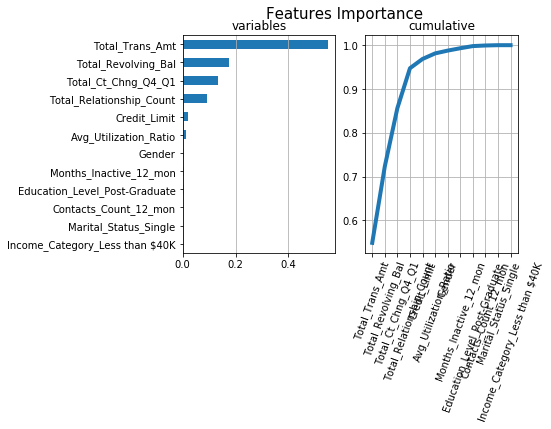

<Figure size 432x288 with 0 Axes>

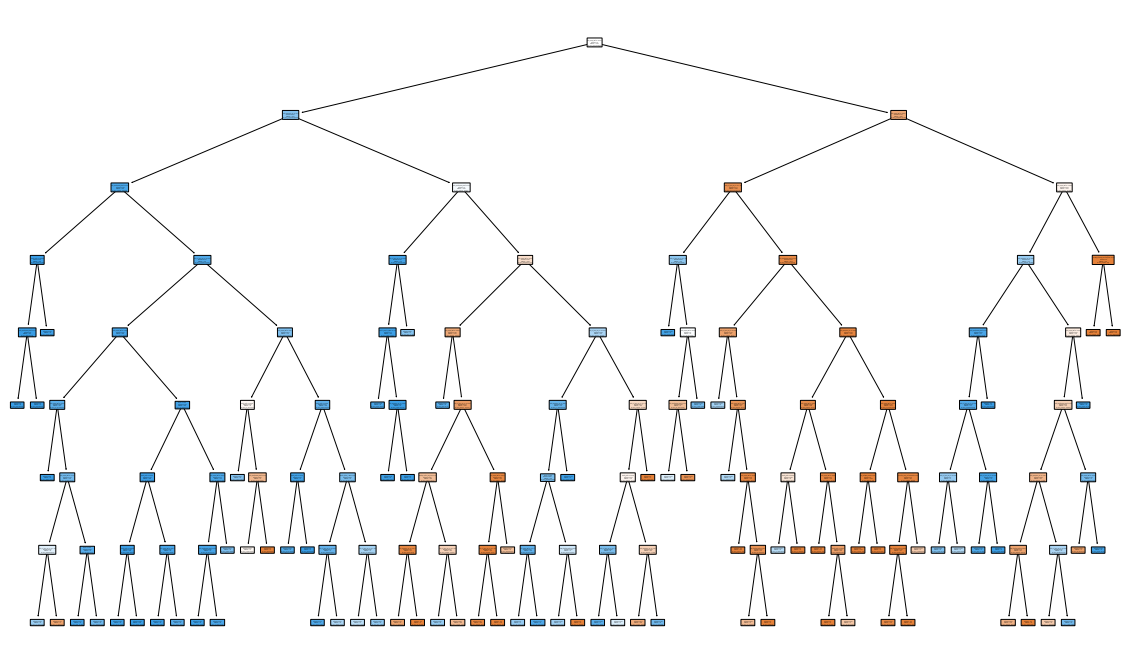

In [29]:
weighted_dtree_results(X_train,X_test,y_train,y_test)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2551
           1       0.62      0.84      0.71       488

    accuracy                           0.89      3039
   macro avg       0.79      0.87      0.82      3039
weighted avg       0.91      0.89      0.90      3039

Confusion Matrix
 [[2297  254]
 [  80  408]]


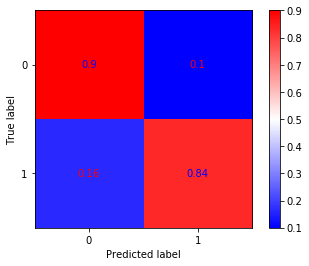

Accuracy Score 89.01 %
Recall: 83.61 %
Precision: 61.63 %
F2 Score: 78.04 %

The Training Accuracy is : 0.9193141704488149
The Testing Accuracy is : 0.8900954261270154
The log loss on training data is  0.18298337561126046
The log loss on testing data is  0.4939641989264674 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.490039
1       6             Total_Revolving_Bal     0.195407
2       2        Total_Relationship_Count     0.102633
3       8             Total_Ct_Chng_Q4_Q1     0.090953
4       5                    Credit_Limit     0.056509
5       0                          Gender     0.025993
6      16          Marital_Status_Married     0.011561
7      17           Marital_Status_Single     0.009983
8       1                 Dependent_count     0.006168
9      22  Income_Category_Less than $40K     0.002414
10     14      Education_Level_Uneducated     0.002284
11     11        Education_Level_Graduate     0.001808
12      9

<Figure size 720x720 with 0 Axes>

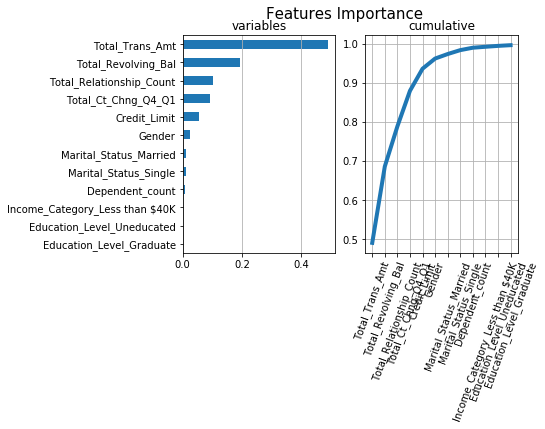

<Figure size 432x288 with 0 Axes>

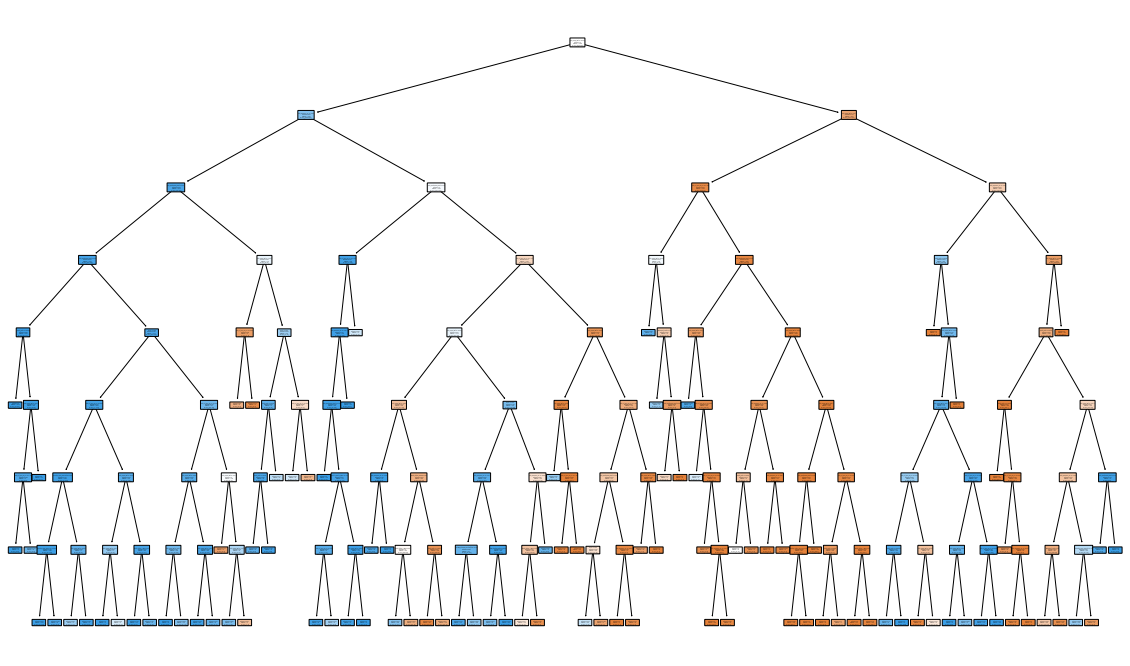

In [30]:
weighted_dtree_results(X_sm,X_test,y_sm,y_test)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      2551
           1       0.55      0.90      0.68       488

    accuracy                           0.87      3039
   macro avg       0.76      0.88      0.80      3039
weighted avg       0.91      0.87      0.88      3039

Confusion Matrix
 [[2193  358]
 [  51  437]]


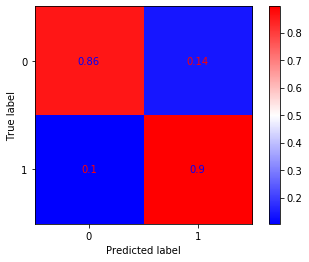

Accuracy Score 86.54 %
Recall: 89.55 %
Precision: 54.97 %
F2 Score: 79.54 %

The Training Accuracy is : 0.9019546027742749
The Testing Accuracy is : 0.8654162553471537
The log loss on training data is  0.20758465701929668
The log loss on testing data is  0.634090471265295 

    index                   Feature_names   Importances
0       7                 Total_Trans_Amt  5.160619e-01
1       8             Total_Ct_Chng_Q4_Q1  1.406713e-01
2       6             Total_Revolving_Bal  1.192395e-01
3       2        Total_Relationship_Count  1.125439e-01
4       5                    Credit_Limit  6.159459e-02
5       0                          Gender  1.773032e-02
6       3          Months_Inactive_12_mon  1.449721e-02
7       9           Avg_Utilization_Ratio  5.754308e-03
8       1                 Dependent_count  5.317440e-03
9      21    Income_Category_$80K - $120K  2.614870e-03
10     17           Marital_Status_Single  2.281216e-03
11     13   Education_Level_Post-Graduate  1.255672e-

<Figure size 720x720 with 0 Axes>

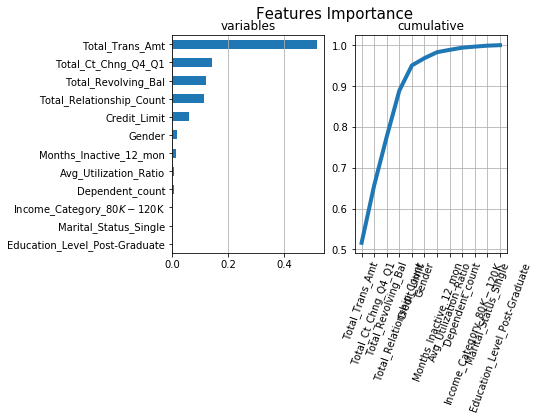

<Figure size 432x288 with 0 Axes>

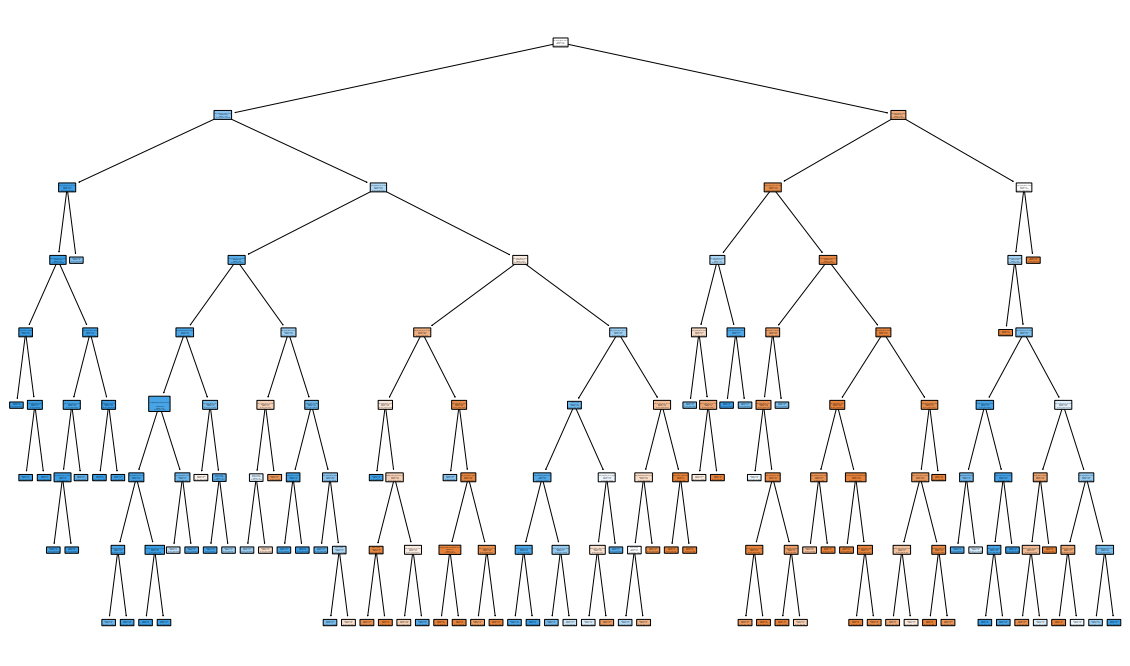

In [31]:
weighted_dtree_results(X_train3,X_test,y_train3,y_test)

## Class weight rebalancing (Post-feature selection)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2551
           1       0.61      0.91      0.73       488

    accuracy                           0.89      3039
   macro avg       0.80      0.90      0.83      3039
weighted avg       0.92      0.89      0.90      3039

Confusion Matrix
 [[2270  281]
 [  46  442]]


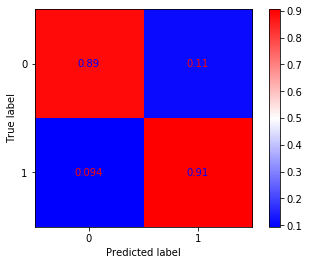

Accuracy Score 89.24 %
Recall: 90.57 %
Precision: 61.13 %
F2 Score: 82.62 %

The Training Accuracy is : 0.9057562076749436
The Testing Accuracy is : 0.8923988153998026
The log loss on training data is  0.2096402760977994
The log loss on testing data is  0.44943523665303037 

    index                  Feature_names   Importances
0       0                Total_Trans_Amt  5.494299e-01
1       1            Total_Revolving_Bal  1.745950e-01
2       2            Total_Ct_Chng_Q4_Q1  1.319082e-01
3       3       Total_Relationship_Count  9.107656e-02
4       4                   Credit_Limit  2.111126e-02
5       5          Avg_Utilization_Ratio  1.269458e-02
6       7                         Gender  7.510043e-03
7      10         Months_Inactive_12_mon  5.410056e-03
8       9  Education_Level_Post-Graduate  4.897065e-03
9       8          Contacts_Count_12_mon  1.367259e-03
10      6                Dependent_count  3.607298e-16 



<Figure size 720x720 with 0 Axes>

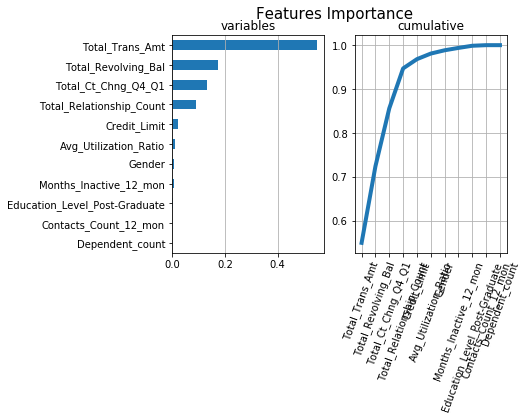

<Figure size 432x288 with 0 Axes>

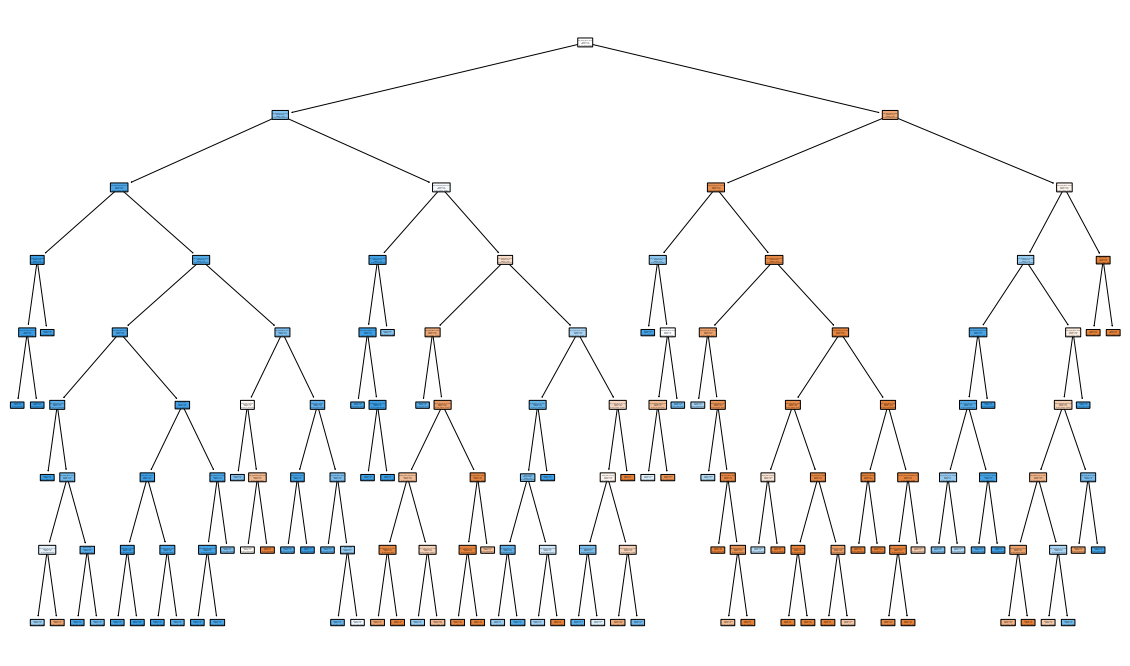

In [32]:
weighted_dtree_results(X_train2,X_test2,y_train,y_test)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2551
           1       0.61      0.84      0.71       488

    accuracy                           0.89      3039
   macro avg       0.79      0.87      0.82      3039
weighted avg       0.91      0.89      0.89      3039

Confusion Matrix
 [[2283  268]
 [  76  412]]


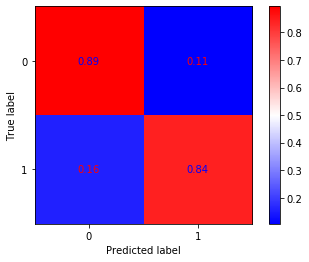

Accuracy Score 88.68 %
Recall: 84.43 %
Precision: 60.59 %
F2 Score: 78.27 %

The Training Accuracy is : 0.9182215498403093
The Testing Accuracy is : 0.8868048700230339
The log loss on training data is  0.17990296116432195
The log loss on testing data is  0.4945113426713757 

    index                  Feature_names  Importances
0       0                Total_Trans_Amt     0.497496
1       1            Total_Revolving_Bal     0.168737
2       3       Total_Relationship_Count     0.116679
3       2            Total_Ct_Chng_Q4_Q1     0.099750
4       4                   Credit_Limit     0.058231
5       7                         Gender     0.035242
6       5          Avg_Utilization_Ratio     0.008974
7      10         Months_Inactive_12_mon     0.007741
8       8          Contacts_Count_12_mon     0.005050
9       6                Dependent_count     0.002100
10      9  Education_Level_Post-Graduate     0.000000 



<Figure size 720x720 with 0 Axes>

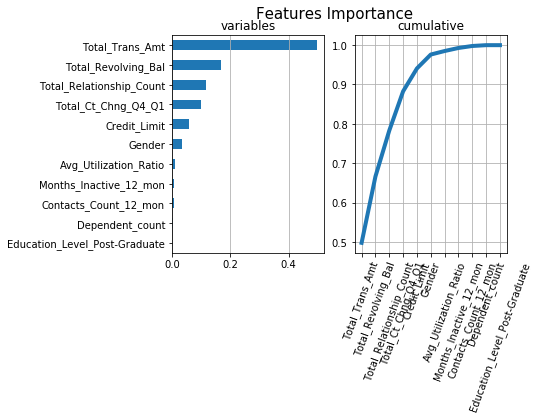

<Figure size 432x288 with 0 Axes>

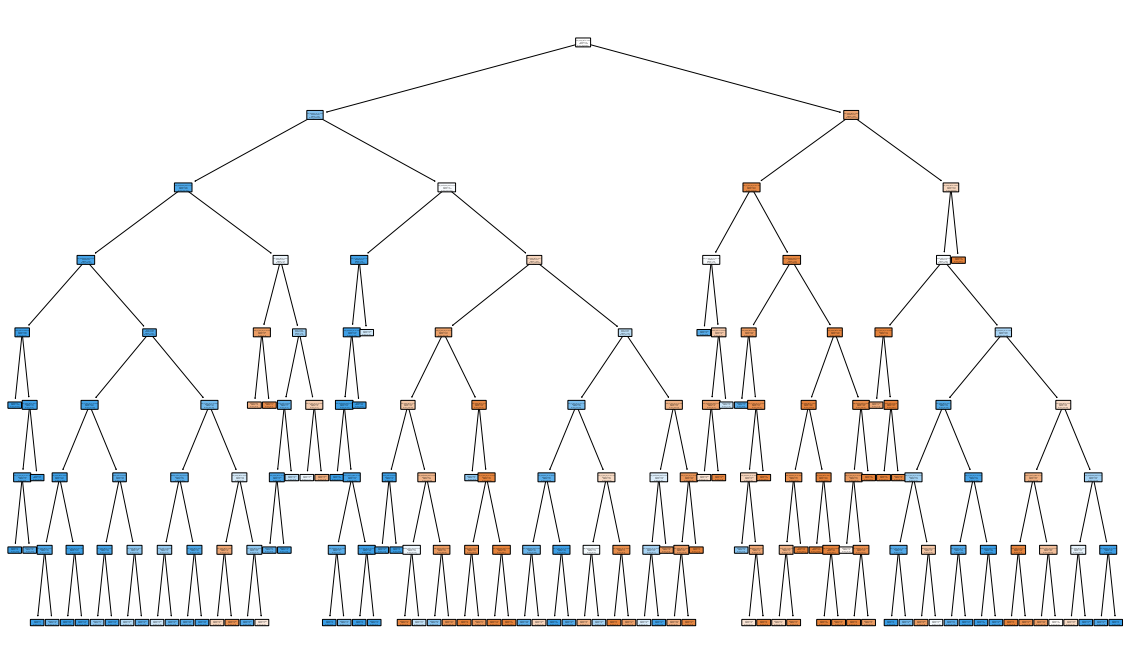

In [33]:
weighted_dtree_results(X_sm2,X_test2,y_sm2,y_test)

Decision Tree Model Results

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2551
           1       0.58      0.90      0.70       488

    accuracy                           0.88      3039
   macro avg       0.78      0.89      0.81      3039
weighted avg       0.91      0.88      0.89      3039

Confusion Matrix
 [[2228  323]
 [  47  441]]


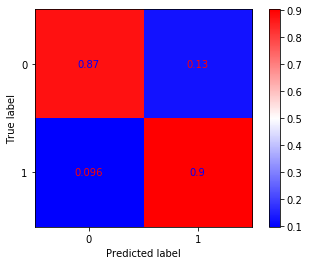

Accuracy Score 87.82 %
Recall: 90.37 %
Precision: 57.72 %
F2 Score: 81.19 %

The Training Accuracy is : 0.905422446406053
The Testing Accuracy is : 0.8782494241526818
The log loss on training data is  0.20354354560215393
The log loss on testing data is  0.6928805403363986 

    index                  Feature_names  Importances
0       0                Total_Trans_Amt     0.532269
1       2            Total_Ct_Chng_Q4_Q1     0.152390
2       3       Total_Relationship_Count     0.122754
3       1            Total_Revolving_Bal     0.108487
4       5          Avg_Utilization_Ratio     0.026492
5       7                         Gender     0.020008
6       4                   Credit_Limit     0.015200
7      10         Months_Inactive_12_mon     0.009676
8       8          Contacts_Count_12_mon     0.006972
9       6                Dependent_count     0.004526
10      9  Education_Level_Post-Graduate     0.001227 



<Figure size 720x720 with 0 Axes>

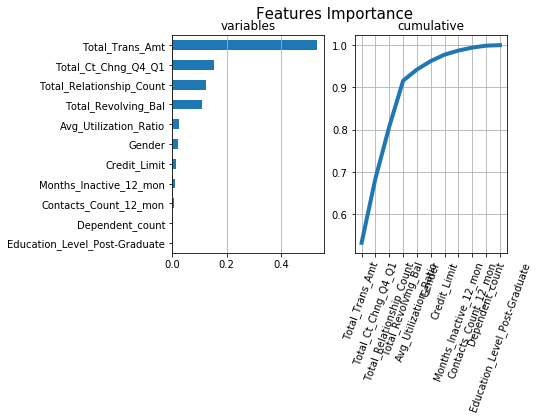

<Figure size 432x288 with 0 Axes>

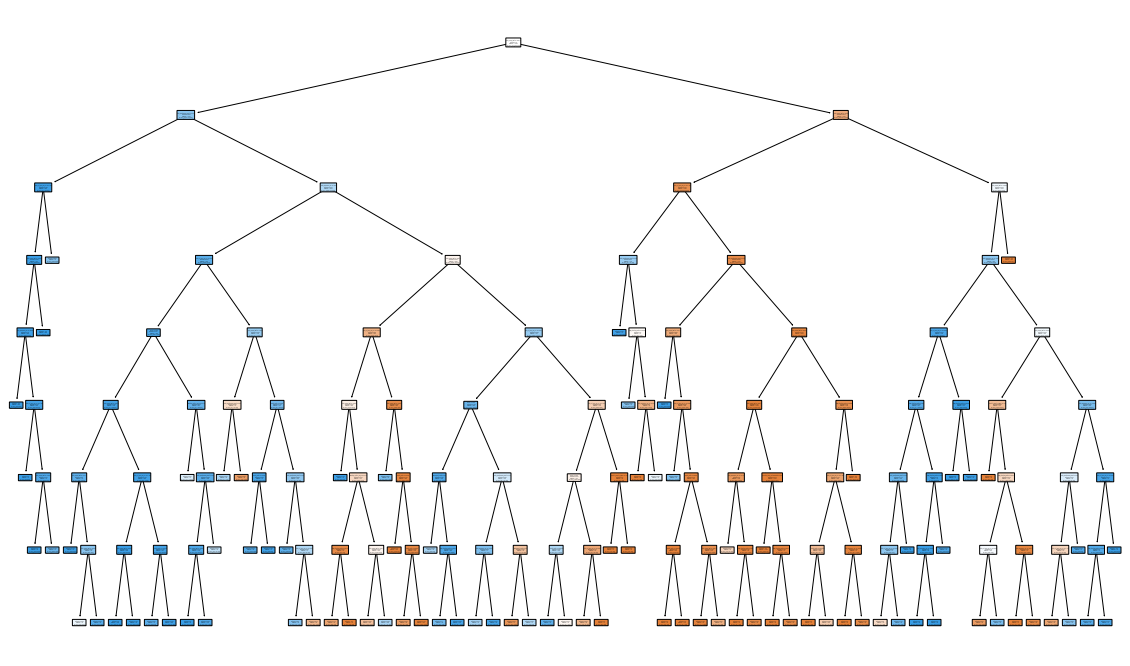

In [34]:
weighted_dtree_results(X_train4,X_test2,y_train4,y_test)